<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/cars_and_people_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
!ls /content/people_cars


test  train


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('/content/people_cars'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in /content/people_cars
there are 2 directories and 0 images in /content/people_cars/train
there are 0 directories and 10 images in /content/people_cars/train/people
there are 0 directories and 10 images in /content/people_cars/train/cars
there are 2 directories and 0 images in /content/people_cars/test
there are 0 directories and 3 images in /content/people_cars/test/people
there are 0 directories and 3 images in /content/people_cars/test/cars


In [ ]:
num_cars_images_train = len(os.listdir('/content/people_cars/train/cars'))
num_cars_images_train

10

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/people_cars/train')
data_dir

PosixPath('/content/people_cars/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cars' 'people']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #pizza_steak /test/pizza
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (194, 260, 3)


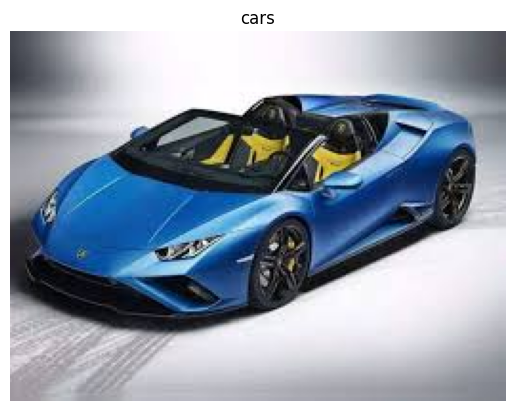

In [ ]:
img = view_random_image(target_dir= '/content/people_cars/train/',
                        target_class= 'cars')

array([[[ 67,  70,  79],
        [ 68,  71,  80],
        [ 70,  73,  82],
        ...,
        [ 80,  80,  90],
        [ 79,  79,  89],
        [ 79,  79,  89]],

       [[ 67,  70,  79],
        [ 68,  71,  80],
        [ 70,  73,  82],
        ...,
        [ 80,  80,  90],
        [ 79,  79,  89],
        [ 79,  79,  89]],

       [[ 67,  70,  79],
        [ 68,  71,  80],
        [ 70,  73,  82],
        ...,
        [ 80,  80,  90],
        [ 79,  79,  89],
        [ 79,  79,  89]],

       ...,

       [[158, 151, 159],
        [160, 153, 161],
        [162, 155, 163],
        ...,
        [130, 133, 142],
        [130, 133, 142],
        [130, 133, 142]],

       [[159, 152, 160],
        [159, 152, 160],
        [160, 153, 161],
        ...,
        [128, 131, 140],
        [128, 131, 140],
        [128, 131, 140]],

       [[159, 152, 160],
        [159, 152, 160],
        [160, 153, 161],
        ...,
        [128, 131, 140],
        [128, 131, 140],
        [128, 131, 140]]], dtype=uint8)
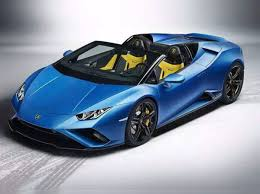

In [ ]:
img

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/people_cars/train'
test_dir = '/content/people_cars/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=2,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=2,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 4s 223ms/step - loss: 0.7829 - accuracy: 0.4500 - val_loss: 0.6589 - val_accuracy: 0.6667
Epoch 2/5
10/10 [==============================] - 1s 133ms/step - loss: 0.6193 - accuracy: 0.7000 - val_loss: 0.5817 - val_accuracy: 0.8333
Epoch 3/5
10/10 [==============================] - 1s 142ms/step - loss: 0.4037 - accuracy: 0.9500 - val_loss: 0.4226 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 1s 135ms/step - loss: 0.2467 - accuracy: 0.9000 - val_loss: 0.3352 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 1s 129ms/step - loss: 0.1167 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.8333


Image shape: (180, 280, 3)
Image shape: (183, 275, 3)


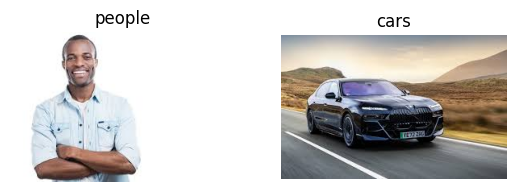

In [ ]:
plt.figure()
plt.subplot(1,2,2)
view_random_image('people_cars/train/', 'cars')
plt.subplot(1,2,1)
view_random_image('people_cars/train/', 'people')
plt.show()

In [ ]:
train_dir = '/content/people_cars/train/'
test_dir = '/content/people_cars/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode='binary',
                                        seed=42)

Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 267ms/step - loss: 0.3619 - accuracy: 0.8333


[0.3619046211242676, 0.8333333134651184]

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.grid()
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.grid(axis='y')
  plt.legend()

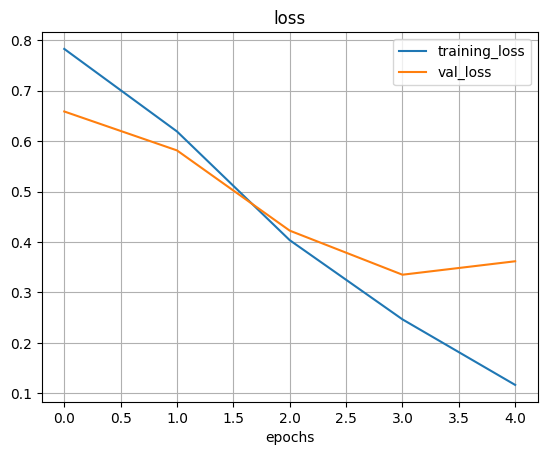

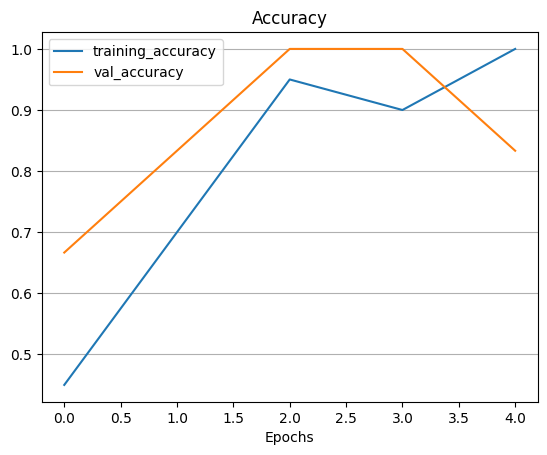

In [ ]:
plot_loss_curves(history_1)

In [ ]:
import matplotlib.image as mpimg
car = mpimg.imread("/content/merc car.jpeg")

<function matplotlib.pyplot.show(close=None, block=None)>

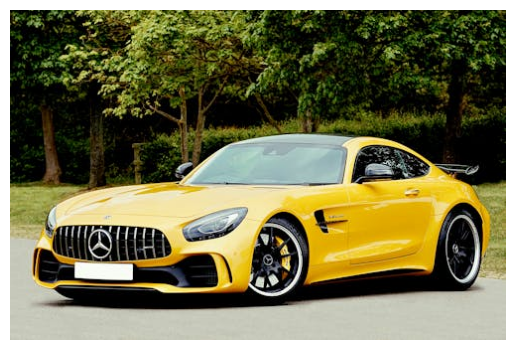

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(car)
plt.axis(False)
plt.show

In [ ]:
car.shape

(333, 500, 3)

In [ ]:
car_norm = ImageDataGenerator(rescale=1/255.)
car_norm

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img =tf.image.resize(img, size= [img_shape, img_shape])
  img = img/255.
  return img

(load_and_prep_image("/content/merc car.jpeg").shape)

TensorShape([224, 224, 3])

In [ ]:
car = load_and_prep_image('/content/merc car.jpeg')
pred = model_1.predict(tf.expand_dims(car, axis=0))

1/1 [==============================] - 0s 205ms/step


In [ ]:
pred

array([[0.78683084]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'people'

1/1 [==============================] - 0s 41ms/step


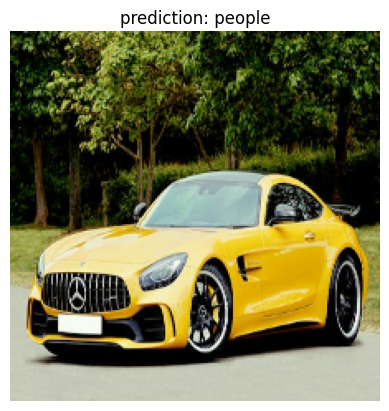

In [ ]:
def pred_and_plotn(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

pred_and_plotn(model_1, "/content/merc car.jpeg")